In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
df = pd.read_csv("StudentsPerformance.csv")
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [6]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [7]:
df.isnull().sum()
df.dropna(inplace=True)

In [8]:
df.rename(columns={'math score':'math','reading score':'reading','writing score':'writing'}, inplace=True)

In [9]:
df['average'] = df[['math','reading','writing']].mean(axis=1)

In [10]:
df.groupby('gender')['average'].mean()

gender
female    69.569498
male      65.837483
Name: average, dtype: float64

In [11]:
df.groupby('test preparation course')['average'].mean()

test preparation course
completed    72.669460
none         65.038941
Name: average, dtype: float64

In [13]:
df['gender'] =df['gender'].map({'female': 0, 'male': 1})

In [15]:
df.corr(numeric_only=True)

,gender,math,reading,writing,average
gender,1.000000,0.167982,-0.244313,-0.301225,-0.130861
math,0.167982,1.000000,0.817580,0.802642,0.918746
reading,-0.244313,0.817580,1.000000,0.954598,0.970331
writing,-0.301225,0.802642,0.954598,1.000000,0.965667
average,-0.130861,0.918746,0.970331,0.965667,1.000000


In [16]:
df.select_dtypes(exclude='number').columns

Index(['race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course'],
      dtype='object')

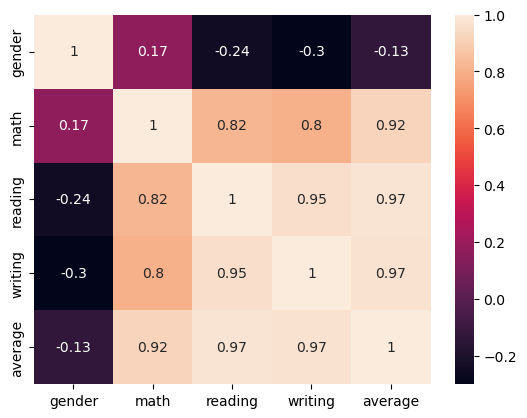

In [17]:
corr = df.corr(numeric_only=True)
import seaborn as sns, matplotlib.pyplot as plt
sns.heatmap(corr, annot=True)
plt.show()

In [18]:
df_encoded = pd.get_dummies(df, columns=['gender','race/ethnicity','lunch','test preparation course'],drop_first=True)

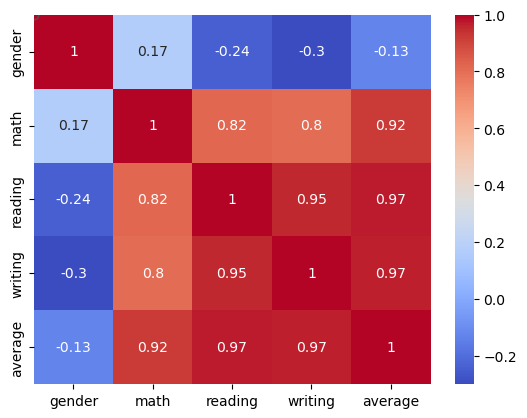

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.histplot(df['average'], kde=True)
sns.boxplot(x='gender', y='math', data=df)
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.show()